In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/set-vantes/ventes.csv


 ## Exploration des données


In [2]:
df = pd.read_csv('/kaggle/input/set-vantes/ventes.csv')
df.head()

,Date,Produit,Catégorie,Quantité,PrixUnitaire,Magasin
0,2022-04-13,Smartphone,Mode,10,1009.00,Lyon
1,2023-03-12,Pantalon,Électronique,2,782.86,Paris
2,2022-09-28,Pantalon,Mode,19,1159.62,Bordeaux
3,2022-04-17,Fromage,Électronique,9,782.64,Bordeaux
4,2022-03-13,TV,Mode,7,1279.01,Marseille


In [3]:
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          200 non-null    object 
 1   Produit       200 non-null    object 
 2   Catégorie     200 non-null    object 
 3   Quantité      200 non-null    int64  
 4   PrixUnitaire  200 non-null    float64
 5   Magasin       200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Quantité,PrixUnitaire
count,200.000000,200.000000
mean,10.155000,691.105900
std,5.506595,412.396293
min,1.000000,26.740000
25%,5.000000,316.852500
50%,10.000000,660.270000
75%,15.000000,1011.815000
max,19.000000,1484.990000


In [6]:
df.isna().sum()

Date            0
Produit         0
Catégorie       0
Quantité        0
PrixUnitaire    0
Magasin         0
dtype: int64

## Nettoyage et préparation


In [7]:
df["Date"] = pd.to_datetime(df["Date"])
print(df["Date"].head())

0   2022-04-13
1   2023-03-12
2   2022-09-28
3   2022-04-17
4   2022-03-13
Name: Date, dtype: datetime64[ns]


In [8]:
df["ChiffreAffaires"]= df["Quantité"]* df["PrixUnitaire"]
df.head()

,Date,Produit,Catégorie,Quantité,PrixUnitaire,Magasin,ChiffreAffaires
0,2022-04-13,Smartphone,Mode,10,1009.00,Lyon,10090.00
1,2023-03-12,Pantalon,Électronique,2,782.86,Paris,1565.72
2,2022-09-28,Pantalon,Mode,19,1159.62,Bordeaux,22032.78
3,2022-04-17,Fromage,Électronique,9,782.64,Bordeaux,7043.76
4,2022-03-13,TV,Mode,7,1279.01,Marseille,8953.07


In [9]:
df.duplicated().sum()


0

## Analyses simples

In [10]:
produit_plus_vendu =  df.groupby("Produit")["Quantité"].sum().idxmax()
Quantite_plus_vendu = df.groupby("Quantité")["Quantité"].sum().idxmax()
print(f"le produit le plut vendu est {produit_plus_vendu} de quantité {Quantite_plus_vendu}")

le produit le plut vendu est Chaussures de quantité 17


In [11]:
df["Catégorie"].unique()

array(['Mode', 'Électronique', 'Alimentaire'], dtype=object)

In [12]:
CA_total_Catégorie = df.groupby("Catégorie")["ChiffreAffaires"].sum()

print(f"le chiffre d'affires total par catégorie")
print(f"{CA_total_Catégorie}")

le chiffre d'affires total par catégorie
Catégorie
Alimentaire     497699.75
Mode            530772.33
Électronique    399622.87
Name: ChiffreAffaires, dtype: float64


In [13]:
df["Magasin"].unique()

array(['Lyon', 'Paris', 'Bordeaux', 'Marseille'], dtype=object)

In [14]:
CA_moyen_magasin = df.groupby("Magasin")["ChiffreAffaires"].mean()

print("Le chiffre d’affaires moyen par magasin")
print(f"{CA_moyen_magasin}")

Le chiffre d’affaires moyen par magasin
Magasin
Bordeaux     7679.619783
Lyon         7883.626458
Marseille    6558.214364
Paris        6582.678039
Name: ChiffreAffaires, dtype: float64


In [15]:
df["Mois"] = df["Date"].dt.month
df.head()

,Date,Produit,Catégorie,Quantité,PrixUnitaire,Magasin,ChiffreAffaires,Mois
0,2022-04-13,Smartphone,Mode,10,1009.00,Lyon,10090.00,4
1,2023-03-12,Pantalon,Électronique,2,782.86,Paris,1565.72,3
2,2022-09-28,Pantalon,Mode,19,1159.62,Bordeaux,22032.78,9
3,2022-04-17,Fromage,Électronique,9,782.64,Bordeaux,7043.76,4
4,2022-03-13,TV,Mode,7,1279.01,Marseille,8953.07,3


In [16]:
Nombre_ventes_mois = df.groupby("Mois").size()
print(f"{Nombre_ventes_mois}")

Mois
1     23
2     15
3      9
4     24
5     17
6      9
7     23
8     17
9     12
10    15
11    17
12    19
dtype: int64


## Analyses avancées

In [17]:
#r le top 5 des produits les plus rentables (en termes de CA)
CA_Produit = df.groupby("Produit")["ChiffreAffaires"].sum().sort_values(ascending=False)
Top_5_Produit = CA_Produit.head()
print(f"{Top_5_Produit}")

Produit
T-shirt       270229.22
Chaussures    254443.11
Laptop        249895.05
Pantalon      200461.17
Fromage       161612.65
Name: ChiffreAffaires, dtype: float64


In [18]:
# Créer un tableau croisé (pivot table) : chiffre d’affaires par Catégorie et par Magasin.
table = pd.pivot_table(df, values='ChiffreAffaires', index=['Catégorie'],
                       columns=['Magasin'], aggfunc="sum")
table


Magasin,Bordeaux,Lyon,Marseille,Paris
Catégorie,,,,
Alimentaire,153836.39,111030.44,94439.95,138392.97
Mode,131471.49,126949.20,143151.48,129200.16
Électronique,67954.63,140434.43,123110.36,68123.45


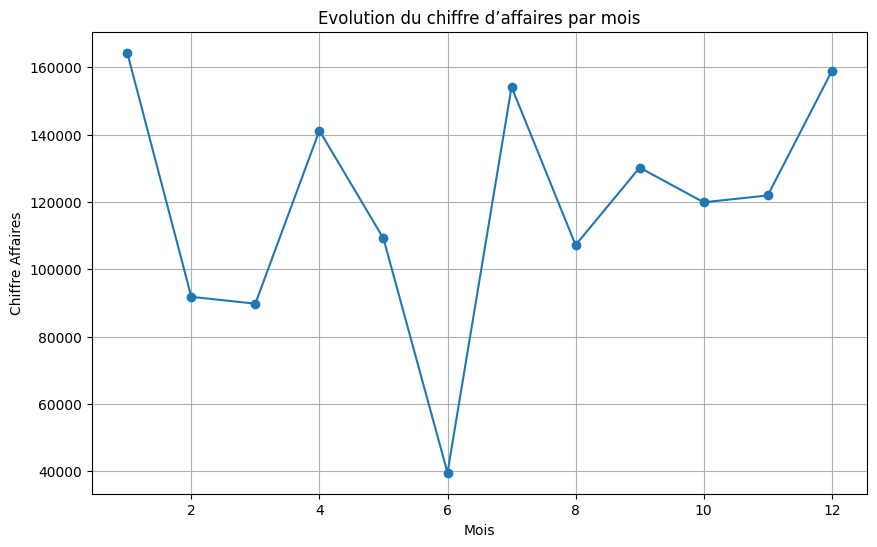

In [19]:
CA_par_Mois =df.groupby('Mois')['ChiffreAffaires'].sum()

plt.figure(figsize=(10, 6))
CA_par_Mois.plot(marker = "o")
plt.xlabel('Mois')
plt.ylabel('Chiffre Affaires')
plt.title('Evolution du chiffre d’affaires par mois')
plt.grid(True)
plt.show()

## Analyses supplémentaires

In [20]:
#Identifier le magasin avec le plus grand chiffre d’affaires cumulé.

CA_cumul_par_magasin = df.groupby("Magasin")["ChiffreAffaires"].sum()
CA_cumul_par_magasin 


Magasin
Bordeaux     353262.51
Lyon         378414.07
Marseille    360701.79
Paris        335716.58
Name: ChiffreAffaires, dtype: float64

In [21]:
Top_magasin = CA_cumul_par_magasin.idxmax()
Top_CA_Cumule = CA_cumul_par_magasin.max()

print(f"Le magasin avec le plus grand chiffre d’affaires cumulé est {Top_magasin} avec Chiffre d’affaires cumulé {Top_CA_Cumule}" )

Le magasin avec le plus grand chiffre d’affaires cumulé est Lyon avec Chiffre d’affaires cumulé 378414.07


In [22]:
# le mois où les ventes (quantité) ont été les plus fortes
Ventes_par_mois = df.groupby("Mois")["Quantité"].sum()
Mois_Top_Quantite = Ventes_par_mois.idxmax()
Top_Quantite = Ventes_par_mois.max()

print(f"Le mois avec le plus de ventes : {Mois_Top_Quantite} avec Quantité vendue {Top_Quantite}")




Le mois avec le plus de ventes : 1 avec Quantité vendue 265


In [23]:
#  Calculer le prix unitaire moyen par produit
df.head()
df["Produit"].unique()

PU_moyen_Produit = df.groupby("Produit")["PrixUnitaire"].mean()
print("le prix unitaire moyen par produit")
PU_moyen_Produit


le prix unitaire moyen par produit


Produit
Chaussures    639.017368
Fromage       692.164800
Laptop        698.736250
Pain          600.907857
Pantalon      630.053929
Smartphone    765.570000
T-shirt       813.896000
TV            674.315625
Name: PrixUnitaire, dtype: float64

In [24]:
# le top 3 des catégories qui génèrent le plus de ventes en volume (quantité).
Top_Catégorie_par_quantité = df.groupby("Catégorie")["Quantité"].sum().sort_values(ascending=False)
Top_Catégorie_par_quantité


Catégorie
Mode            751
Alimentaire     666
Électronique    614
Name: Quantité, dtype: int64

In [25]:
# Extraction des jour de la semaine 
df["Jour_semaine"] = df["Date"].dt.day_name()

# Traduction en français
jours_trad = {
    "Monday": "Lundi",
    "Tuesday": "Mardi",
    "Wednesday": "Mercredi",
    "Thursday": "Jeudi",
    "Friday": "Vendredi",
    "Saturday": "Samedi",
    "Sunday": "Dimanche"
}
df["Jour_semaine"] = df["Jour_semaine"].map(jours_trad)
df.head()

,Date,Produit,Catégorie,Quantité,PrixUnitaire,Magasin,ChiffreAffaires,Mois,Jour_semaine
0,2022-04-13,Smartphone,Mode,10,1009.00,Lyon,10090.00,4,Mercredi
1,2023-03-12,Pantalon,Électronique,2,782.86,Paris,1565.72,3,Dimanche
2,2022-09-28,Pantalon,Mode,19,1159.62,Bordeaux,22032.78,9,Mercredi
3,2022-04-17,Fromage,Électronique,9,782.64,Bordeaux,7043.76,4,Dimanche
4,2022-03-13,TV,Mode,7,1279.01,Marseille,8953.07,3,Dimanche


Jour_semaine
Lundi       196628.40
Mardi       122919.38
Mercredi    233992.48
Jeudi       187072.36
Vendredi    206567.29
Samedi      299074.28
Dimanche    181840.76
Name: ChiffreAffaires, dtype: float64


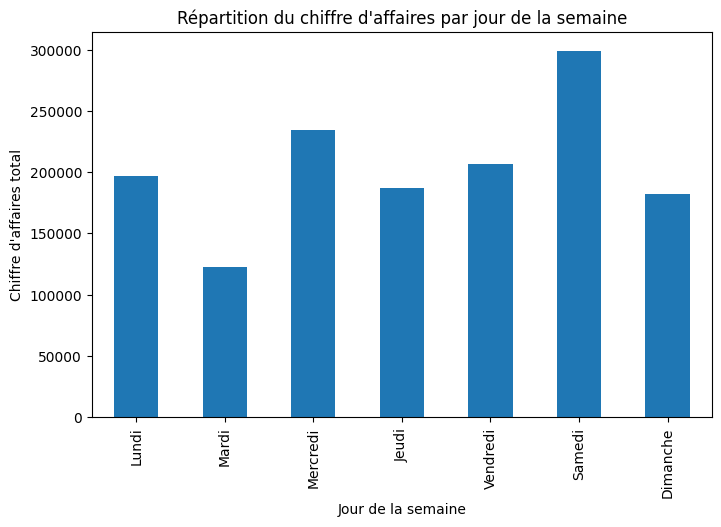

In [26]:
# Analyser la répartition des ventes par jour de la semaine (CA total)
CA_par_Jour = df.groupby('Jour_semaine')["ChiffreAffaires"].sum().reindex(
    ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"])
print(CA_par_Jour)
# Afficher le graphique
plt.figure(figsize=(8,5))
CA_par_Jour.plot(kind="bar")
plt.title("Répartition du chiffre d'affaires par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Chiffre d'affaires total")
plt.show()

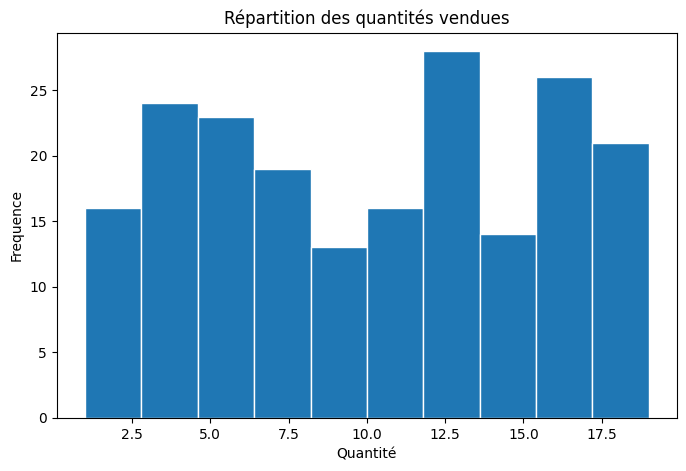

In [27]:
#  un histogramme représentant la répartition des quantités vendues.
plt.figure(figsize=(8,5))
plt.hist(df["Quantité"],bins = 10,edgecolor="white")
plt.title("Répartition des quantités vendues")
plt.xlabel("Quantité")
plt.ylabel("Frequence")
plt.show()

# Traitement et modélisation avec Scikit-Learn


## Preprocessing

In [28]:
new_df = df[["Catégorie","Quantité","PrixUnitaire","Magasin","ChiffreAffaires"]]
new_df.head()

,Catégorie,Quantité,PrixUnitaire,Magasin,ChiffreAffaires
0,Mode,10,1009.00,Lyon,10090.00
1,Électronique,2,782.86,Paris,1565.72
2,Mode,19,1159.62,Bordeaux,22032.78
3,Électronique,9,782.64,Bordeaux,7043.76
4,Mode,7,1279.01,Marseille,8953.07


In [29]:
#Transformer les variables catégorielles (Catégorie, Magasin) en variables numériques en utilisant Scikit-learn.

df_encoded = new_df[["Catégorie","Quantité","PrixUnitaire","Magasin","ChiffreAffaires"]].copy()
# En utilisant label Encoder

le = LabelEncoder()

df_encoded["Catégorie"] = le.fit_transform(df_encoded["Catégorie"])
df_encoded["Magasin"] = le.fit_transform(df_encoded["Magasin"])

print(new_df.head())
print(df_encoded.head())

      Catégorie  Quantité  PrixUnitaire    Magasin  ChiffreAffaires
0          Mode        10       1009.00       Lyon         10090.00
1  Électronique         2        782.86      Paris          1565.72
2          Mode        19       1159.62   Bordeaux         22032.78
3  Électronique         9        782.64   Bordeaux          7043.76
4          Mode         7       1279.01  Marseille          8953.07
   Catégorie  Quantité  PrixUnitaire  Magasin  ChiffreAffaires
0          1        10       1009.00        1         10090.00
1          2         2        782.86        3          1565.72
2          1        19       1159.62        0         22032.78
3          2         9        782.64        0          7043.76
4          1         7       1279.01        2          8953.07


In [30]:
 # Séparer les données en X (features) et y (target) :
X = df_encoded.drop(columns=['ChiffreAffaires'])
y = df_encoded['ChiffreAffaires']


In [31]:
# Découper le dataset en jeu d’entraînement et jeu de test 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

# Régression (prédiction du Chiffre d’Affaires)

## Regression linéaire 

In [32]:
# Créeation du modèle de régression linéaire
LR = LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [33]:
# Coefficients et intercept
print("Coefficients:", LR.coef_)
print("Intercept:", LR.intercept_)

Coefficients: [222.70975242 703.35010962  10.34685123 271.13912579]
Intercept: -7994.12345356755


In [34]:
# Prédire les valeurs pour la régression linéaire
y_pred_lr = LR.predict(X_test)
print("Predicted values:", y_pred_lr)

Predicted values: [-2116.17622212  6124.07869436 18457.6055971  17008.24745442
 15261.60765836  5709.76823209  2862.49184381 13857.64924407
  -153.92466408  -353.38944979 -1915.31466258  2164.95424021
  7089.09559246 11844.42037356  9995.54306031  5719.48794135
 -3201.40604506 13851.45072984 -2569.25289895 16149.02242251
 17196.0306445  -4619.70056647 12386.07301581  6545.18926797
 14269.53363366  8242.55068844 11545.12160422 10716.75902582
 -4739.09740083 11885.93026606 -2068.29935906  4809.62712174
 -1242.1319041   1798.91724989  6527.44471687  9509.37335796
   598.96435696 12825.52171643 14264.35387716  3563.05538423
  5333.00471322 -2227.11747532  4706.38752397 16136.51969048
  9412.29535276 15579.03134633  7325.65197527 12044.14321784
  4653.43998045  3547.45436611 15770.97070379 18639.39977318
  3950.47644067  3539.8779354  -3541.40335513  8017.61466019
  3754.77043732 18715.7994417   4511.86741109  6489.79380964]


In [35]:
# Évaluation du modèle linear rgression (score)

r2_lr = r2_score(y_test, y_pred_lr)

print(f"R-squared (R2 Score): {r2_lr:.2f}")

R-squared (R2 Score): 0.87


## Random Forest Regressor

In [36]:
# Initialiser et entraîner Random Forest regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# Prédire les valeurs pour Random Forest regression
y_pred_rf = rf_regressor.predict(X_test)
print("Predicted values:", y_pred_rf)

Predicted values: [  987.1466  3628.0464 22423.5599 17291.7022 11888.8418  4633.4304
  1680.0397 10898.1461  1774.6342  1618.1738  1091.922   2510.0627
  7611.3259  9195.5448 10624.0074  4528.754    566.7895 11612.1959
   485.6782 17509.3685 18985.7575   442.2307 13105.7571  1574.9157
 16281.3905  8284.983   9719.4519  9408.1752   515.823  10477.7645
   843.3488  4293.7614  1579.835   3386.1539  5543.1823 11014.7241
  2295.7253 10160.2182 14872.6542  3648.5669  5918.1553   879.2434
  4546.1662 19857.1131  6773.7154 18399.1481  4348.4492  9599.0061
  3804.7596  3600.9127 11881.1819 22733.7897  4185.35    2099.813
   701.0316  4536.5686  3784.7072 21717.1147  1467.3321  5809.0577]


In [38]:
# Évaluation du modèle Random Forest regression (score)

r2_rf = r2_score(y_test, y_pred_rf)

print(f"R-squared (R2 Score): {r2_rf:.2f}")

R-squared (R2 Score): 0.97


In [39]:
comparison = pd.DataFrame({
    "Modèle": ["Régression Linéaire", "Random Forest regression"],
    "R² Score": [r2_lr, r2_rf] })

comparison

,Modèle,R² Score
0,Régression Linéaire,0.874337
1,Random Forest regression,0.974466


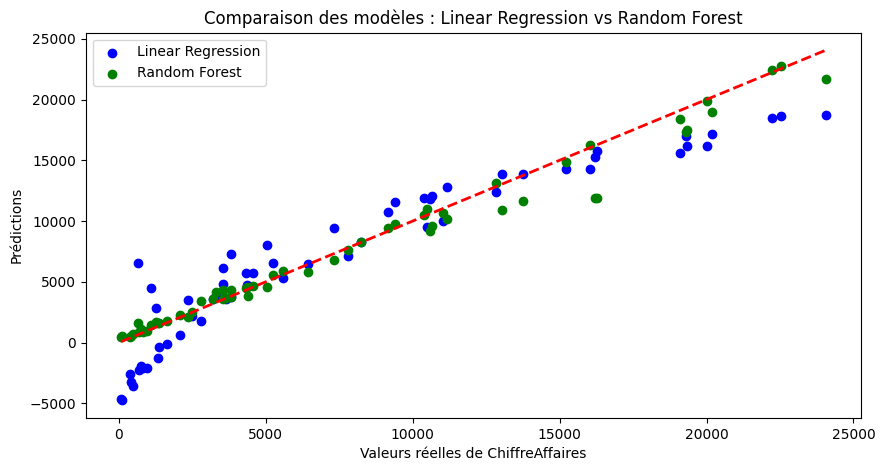

In [40]:
plt.figure(figsize=(10,5))

# Scatter plot pour Linear Regression
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')

# Scatter plot pour Random Forest
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')

# Ajouter la ligne y=x pour référence
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Valeurs réelles de ChiffreAffaires")
plt.ylabel("Prédictions")
plt.title("Comparaison des modèles : Linear Regression vs Random Forest")
plt.legend()
plt.show()

In [46]:
print(y_pred_lr.shape)
print(y_pred_rf.shape)

(60,)
(60,)


In [54]:
# Prédire avec les modèles déjà entrainéé (linear regression et random forest regression)
predictions_lr = LR.predict(X)
predictions_rf = rf_regressor.predict(X)
# Ajouter les prédictions dans ton nouveau DataFrame
new_df["CA_predicted_lr"] = predictions_lr
new_df["CA_predicted_rf"] = predictions_rf

# Afficher
new_df.head(10)

/tmp/ipykernel_36/1891286388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["CA_predicted_lr"] = predictions_lr
/tmp/ipykernel_36/1891286388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["CA_predicted_rf"] = predictions_rf


,Catégorie,Quantité,PrixUnitaire,Magasin,ChiffreAffaires,CA_predicted_lr,CA_predicted_rf
0,Mode,10,1009.00,Lyon,10090.00,9973.199410,10218.6716
1,Électronique,2,782.86,Paris,1565.72,2771.549600,1705.8592
2,Mode,19,1159.62,Bordeaux,22032.78,17590.654002,20733.8350
3,Électronique,9,782.64,Bordeaux,7043.76,6879.306683,7164.5285
4,Mode,7,1279.01,Marseille,8953.07,10928.041507,9272.6324
5,Alimentaire,4,830.10,Marseille,3320.40,3950.476441,4185.3500
6,Électronique,18,843.60,Marseille,15184.80,14382.479972,15066.0482
7,Électronique,13,1315.60,Lyon,17102.80,15478.304077,16747.8146
8,Électronique,11,608.21,Lyon,6690.31,6752.344768,6765.8156
9,Électronique,4,205.35,Marseille,821.40,-2068.299359,843.3488
